# 1: Preparação do Ambiente e Carregamento dos Dados

In [2]:
# Importa a biblioteca pandas
import pandas as pd

# Define o caminho do arquivo
path = r"C:\Users\arthu\OneDrive\Documentos\DATA ANALYSIS\TGI\tgi_simulado_engov.xlsx"

# Carrega o dataset
try:
    df_engov = pd.read_excel(path)
    print("Dataset carregado com sucesso!\n")

    # Mostra as 5 primeiras linhas do dataset para uma visualização inicial
    print("--- Visualização Inicial do Dataset ---")
    print(df_engov.head())
    print("\n")

    # Mostra informações sobre as colunas, tipos de dados e valores nulos
    print("--- Informações do Dataset ---")
    df_engov.info()

except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado no caminho especificado: {path}")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

Dataset carregado com sucesso!

--- Visualização Inicial do Dataset ---
   Respondent_ID Sexo  Idade Classe Regiao Consome_Engov Frequencia_Alcool  \
0              1    M     34      B     PR           Não             Média   
1              2    F     31      C     BA           Sim             Baixa   
2              3    M     31      B     RJ           Sim             Baixa   
3              4    M     40      B     SP           Não             Baixa   
4              5    M     44      B     BA           Sim             Baixa   

  Sai_para_Balada Midia_Preferida  Indice_Afinidade  Peso_Projecao  
0           Nunca         YouTube                90           3187  
1       1x/semana       Instagram               175           3741  
2           Nunca        Rádio FM                94           1271  
3       1x/semana        Rádio FM               159           1040  
4       2x/semana       TV Aberta                77           2135  


--- Informações do Dataset ---
<class 'pand

# 2: Análise Exploratória de Dados

--- Análise da Variável: Sexo ---
      Contagem  Porcentagem
Sexo                       
M          109         54.5
F           91         45.5




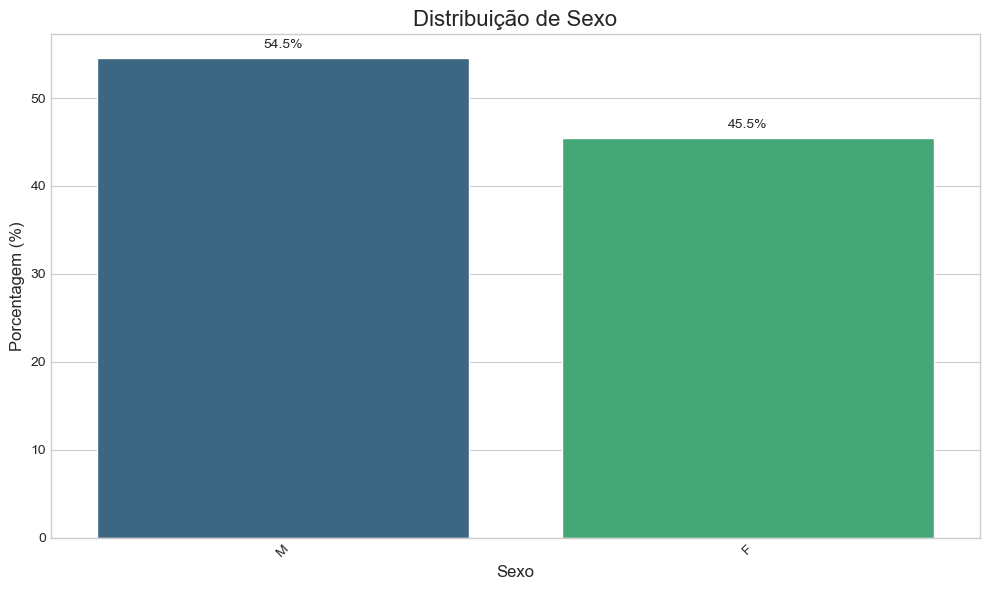



--- Análise da Variável: Classe ---
        Contagem  Porcentagem
Classe                       
B            100         50.0
C             58         29.0
A             42         21.0




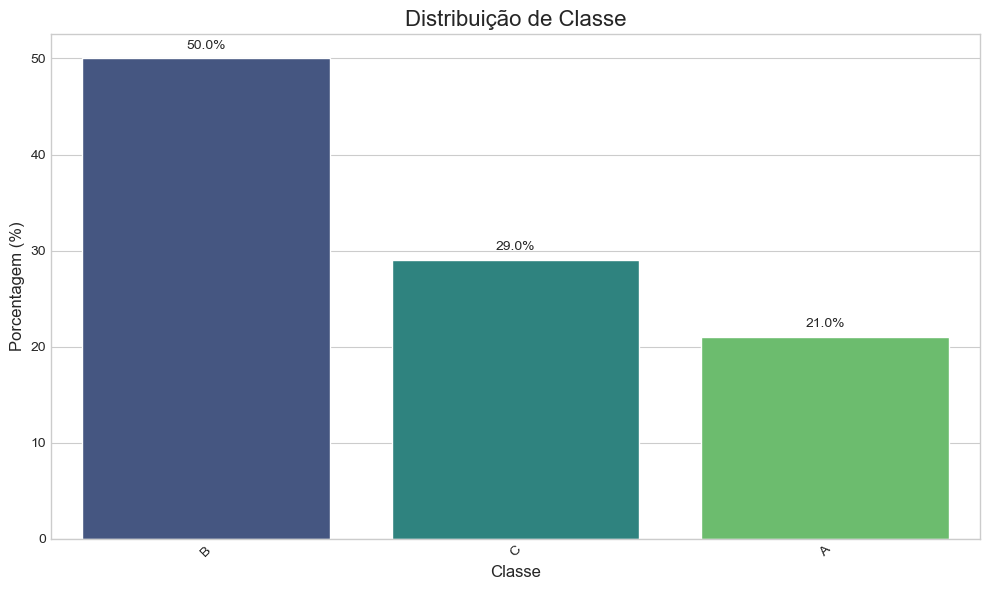



--- Análise da Variável: Regiao ---
        Contagem  Porcentagem
Regiao                       
PR            35         17.5
RJ            34         17.0
MG            30         15.0
BA            27         13.5
SP            26         13.0
RS            26         13.0
PE            22         11.0




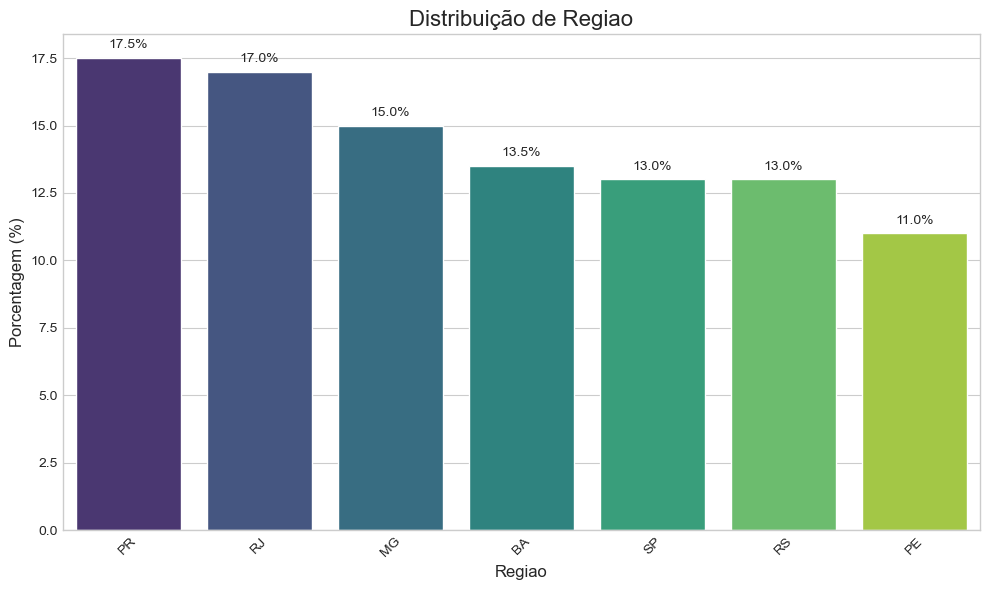



--- Análise da Variável: Consome_Engov ---
               Contagem  Porcentagem
Consome_Engov                       
Sim                 123         61.5
Não                  77         38.5




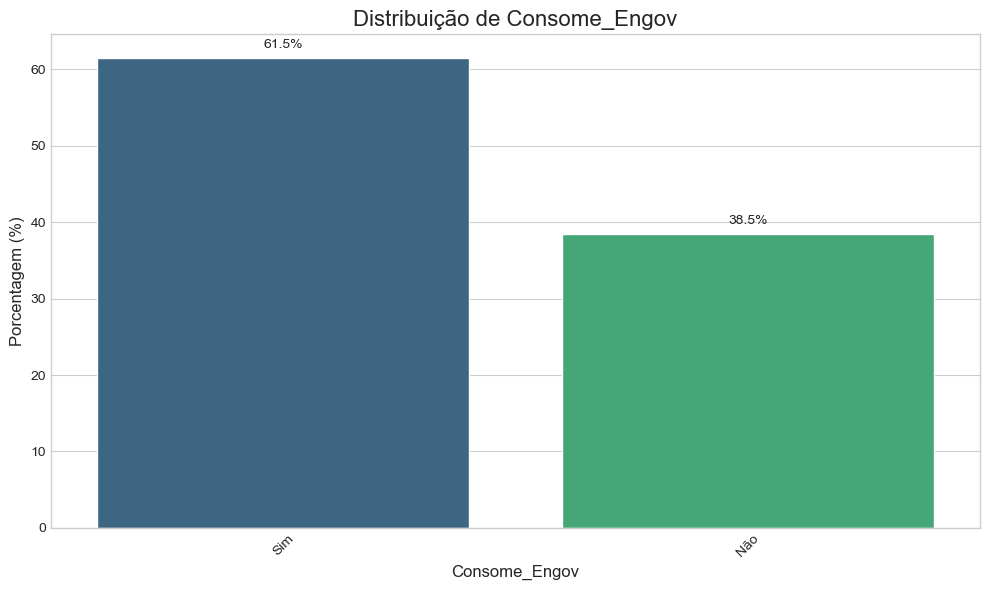



--- Análise da Variável: Frequencia_Alcool ---
                   Contagem  Porcentagem
Frequencia_Alcool                       
Média                    74         37.0
Alta                     68         34.0
Baixa                    58         29.0




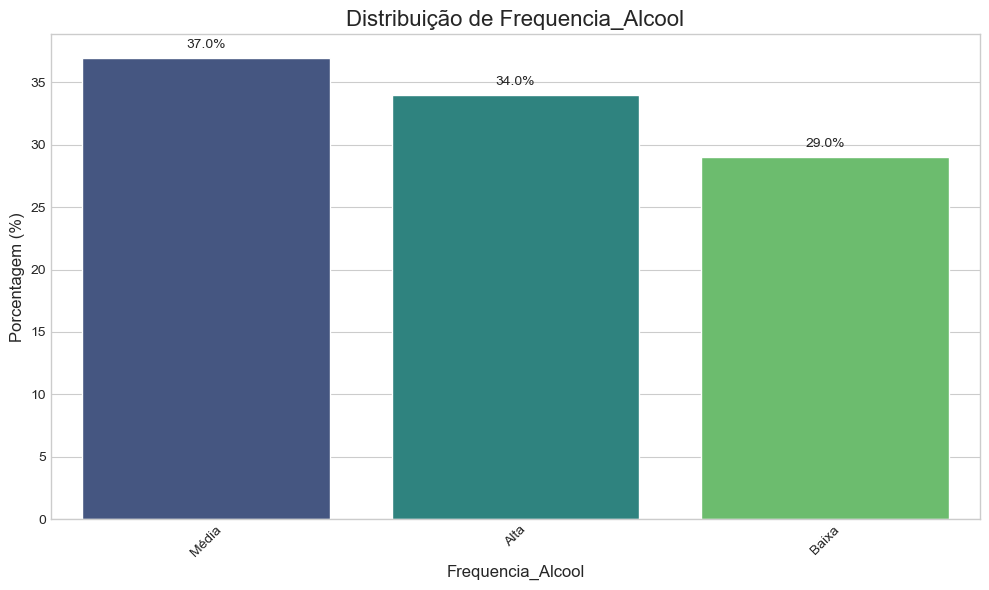



--- Análise da Variável: Sai_para_Balada ---
                 Contagem  Porcentagem
Sai_para_Balada                       
1x/semana              66         33.0
1x/mês                 45         22.5
2x/semana              40         20.0
Nunca                  35         17.5
3x/semana              14          7.0




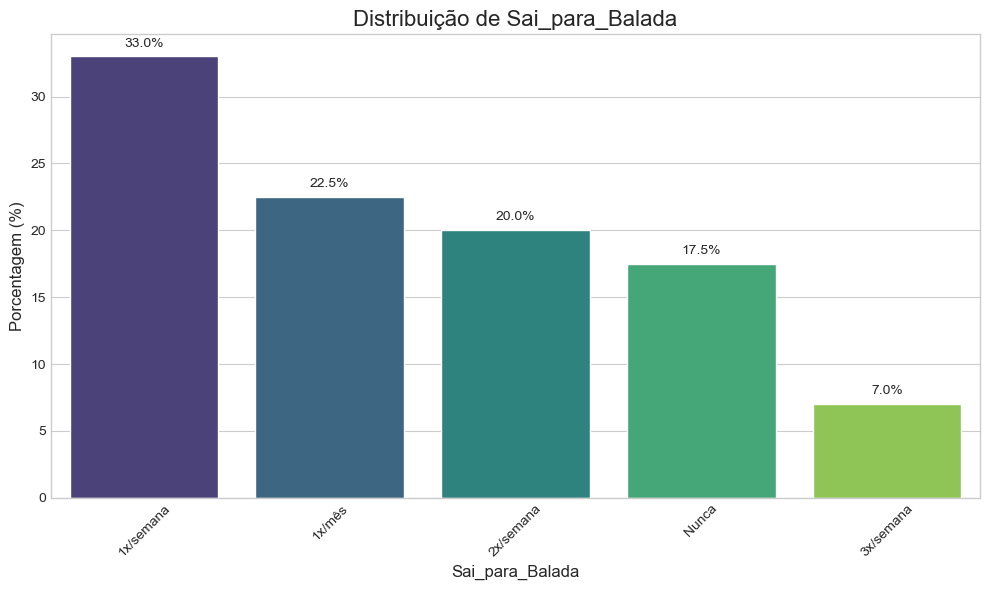



--- Análise da Variável: Midia_Preferida ---
                 Contagem  Porcentagem
Midia_Preferida                       
TV Aberta              38         19.0
TikTok                 36         18.0
Spotify                33         16.5
YouTube                28         14.0
Instagram              26         13.0
Revistas               22         11.0
Rádio FM               17          8.5




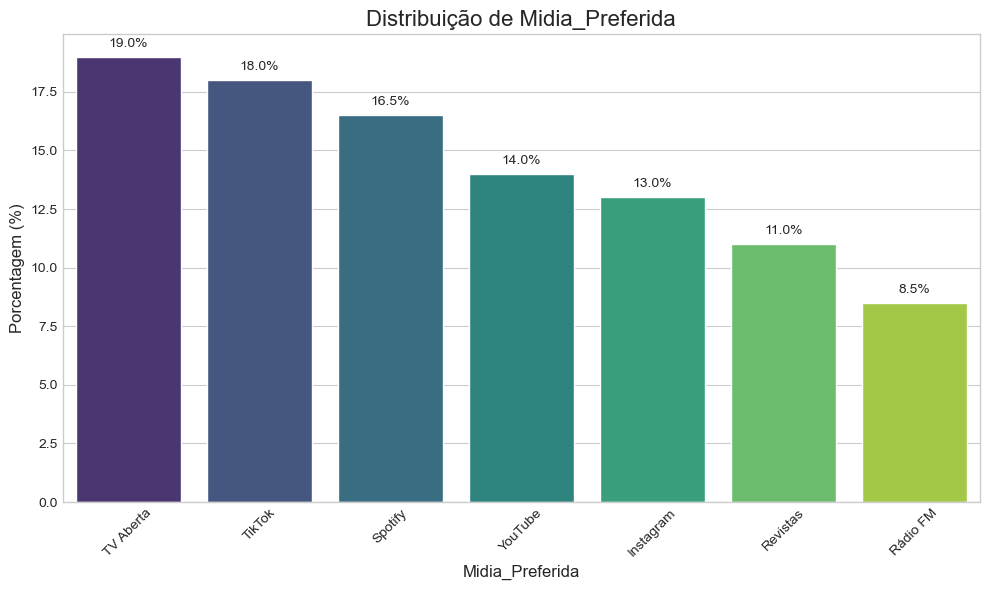

In [4]:
# Importa as bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de colunas categóricas para análise
categorical_cols = ['Sexo', 'Classe', 'Regiao', 'Consome_Engov', 'Frequencia_Alcool', 'Sai_para_Balada', 'Midia_Preferida']

# Configuração para um estilo de visualização mais profissional
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# Itera sobre cada coluna categórica
for col in categorical_cols:
    print(f"--- Análise da Variável: {col} ---")
    
    # 1. Análise Numérica: Contagem e Porcentagem
    counts = df_engov[col].value_counts()
    percentages = 100 * counts / len(df_engov)

    # Cria um DataFrame para exibir os resultados de forma clara
    summary_df = pd.DataFrame({'Contagem': counts, 'Porcentagem': percentages.round(2)})
    print(summary_df)
    print("\n")

    # 2. Visualização Gráfica: Gráfico de Barras
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=percentages.index, y=percentages.values, palette='viridis', hue=percentages.index, legend=False)
    
    # Adiciona os rótulos de porcentagem acima das barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='bottom', 
                    xytext=(0, 5), 
                    textcoords='offset points')

    # Define o título e os rótulos dos eixos
    plt.title(f'Distribuição de {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Porcentagem (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n" + "="*50 + "\n") # Separador para o próximo gráfico

--- Análise da Variável Numérica: Idade ---
count    200.000000
mean      39.190000
std       12.096093
min       18.000000
25%       30.000000
50%       40.000000
75%       49.000000
max       59.000000
Name: Idade, dtype: float64




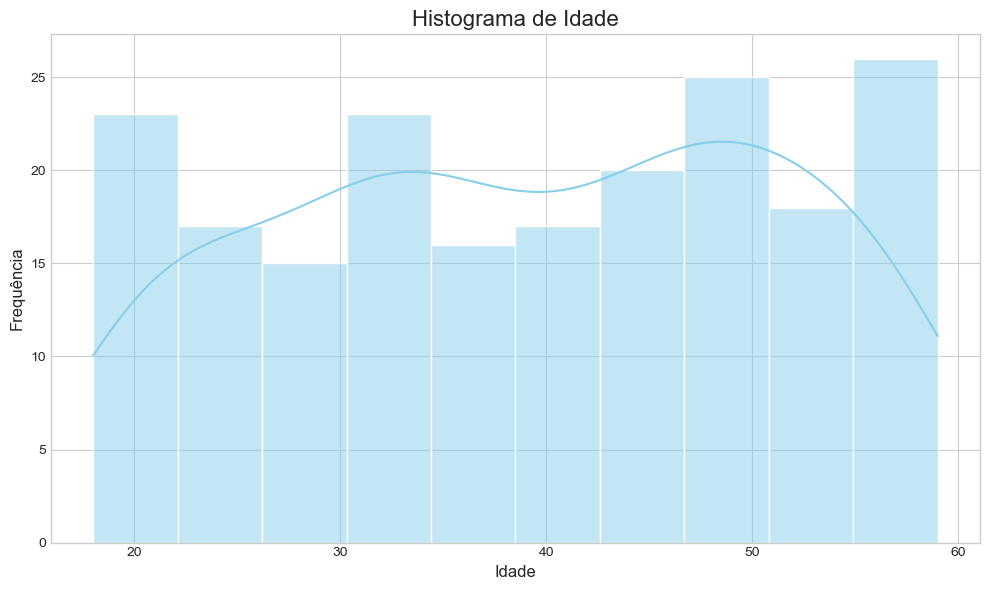



--- Análise da Variável Numérica: Indice_Afinidade ---
count    200.00000
mean     133.86000
std       41.09531
min       61.00000
25%       97.00000
50%      135.50000
75%      170.25000
max      200.00000
Name: Indice_Afinidade, dtype: float64




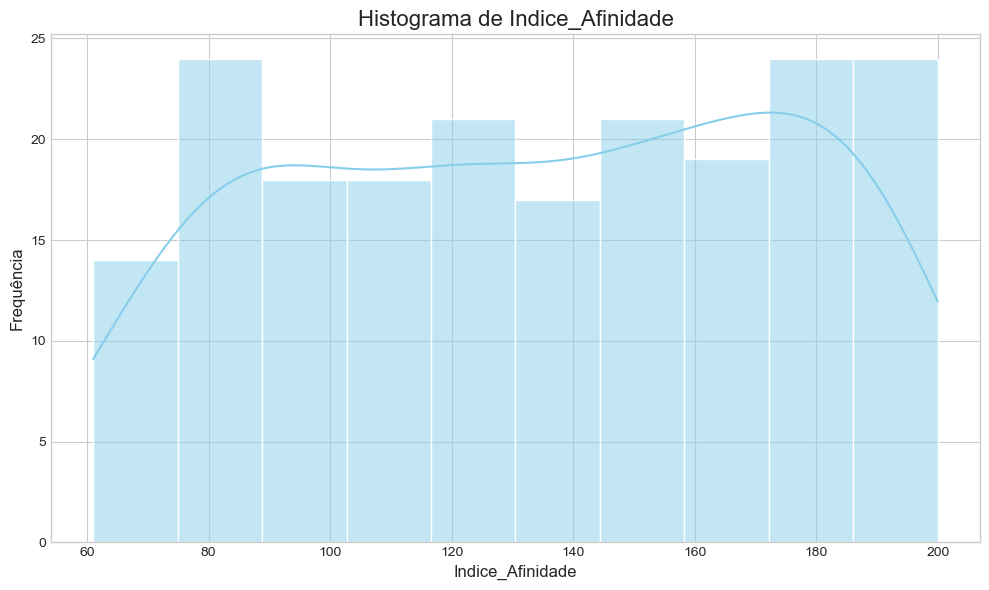



--- Análise da Variável Numérica: Peso_Projecao ---
count     200.00000
mean     2757.13000
std      1294.76004
min       546.00000
25%      1647.00000
50%      2809.00000
75%      3935.25000
max      4902.00000
Name: Peso_Projecao, dtype: float64




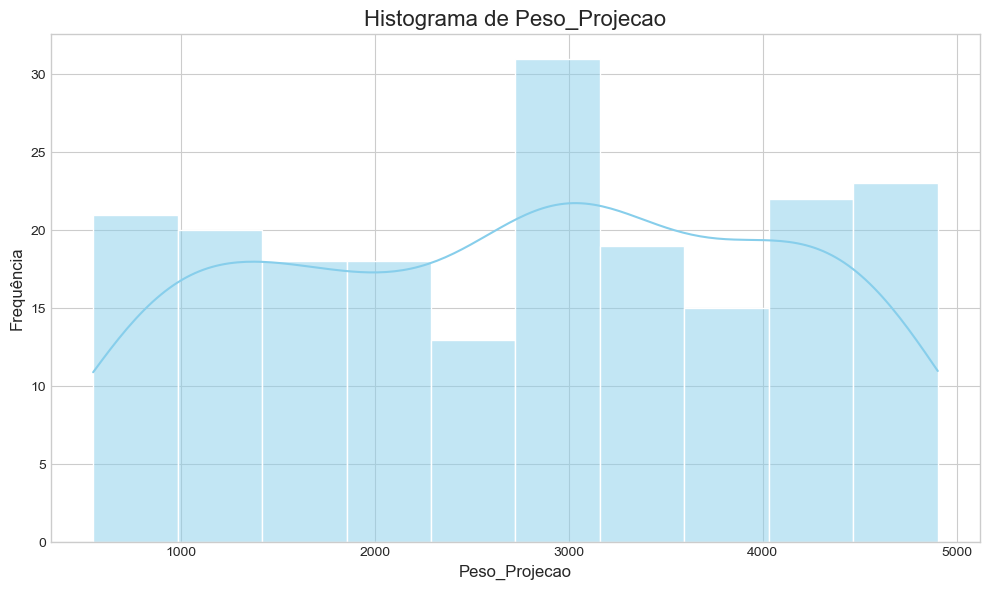

In [6]:
# Importa as bibliotecas necessárias para visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de colunas numéricas para análise
numerical_cols = ['Idade', 'Indice_Afinidade', 'Peso_Projecao']

# Configuração para um estilo de visualização consistente
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# Itera sobre cada coluna numérica
for col in numerical_cols:
    print(f"--- Análise da Variável Numérica: {col} ---")
    
    # 1. Análise Numérica: Estatísticas Descritivas
    # Usa .describe() para obter as principais estatísticas
    print(df_engov[col].describe())
    print("\n")

    # 2. Visualização Gráfica: Histograma
    plt.figure(figsize=(10, 6))
    
    # Cria o histograma com a curva de densidade (kde)
    sns.histplot(df_engov[col], kde=True, bins=10, color='skyblue')
    
    # Define o título e os rótulos dos eixos
    plt.title(f'Histograma de {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)

    plt.tight_layout()
    plt.show()
    print("\n" + "="*50 + "\n")

# 03 Cruzamentos e Aprofundamento

#### 1: Perfil de Consumidor vs. Não-Consumidor por Mídia

--- Análise da Mídia Preferida por Consumo de Engov ---
Tabela de Porcentagens:
Consome_Engov      Não    Sim
Midia_Preferida              
Instagram        10.39  14.63
Revistas         12.99   9.76
Rádio FM          6.49   9.76
Spotify          19.48  14.63
TV Aberta        12.99  22.76
TikTok           19.48  17.07
YouTube          18.18  11.38




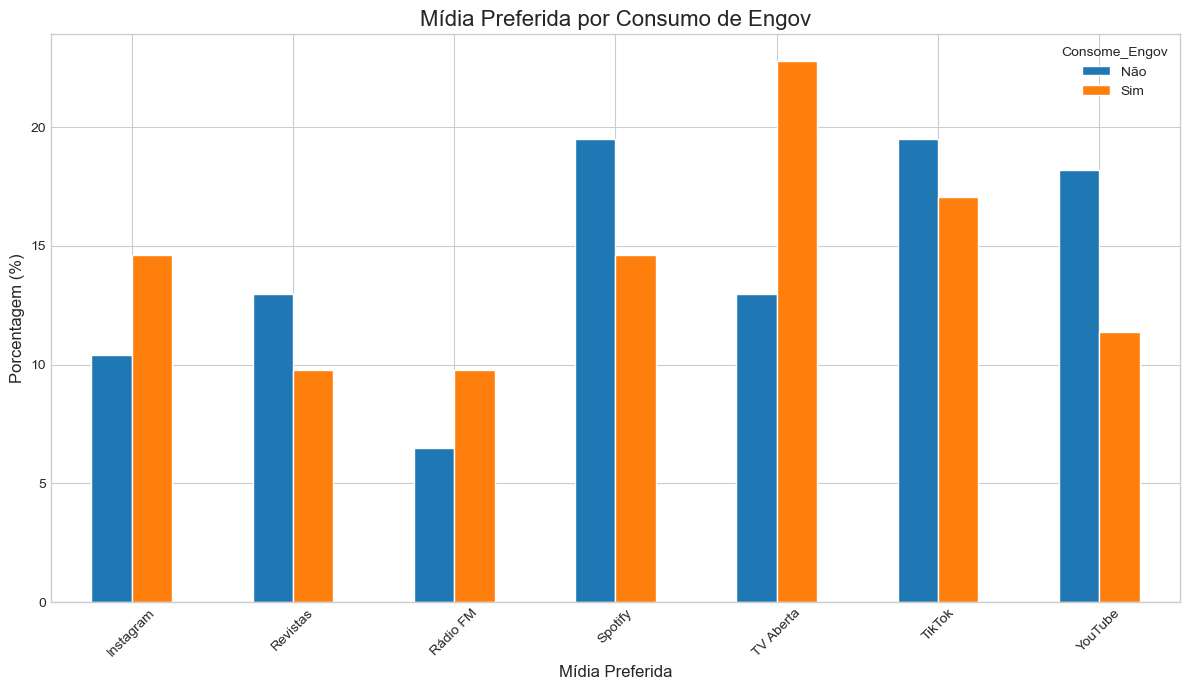

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cria a tabela de contingência com porcentagens por coluna
# Isso mostra a porcentagem de cada mídia preferida DENTRO do grupo de "Sim" e "Não"
cross_tab_percentage = pd.crosstab(df_engov['Midia_Preferida'], df_engov['Consome_Engov'], normalize='columns') * 100

print("--- Análise da Mídia Preferida por Consumo de Engov ---")
print("Tabela de Porcentagens:")
print(cross_tab_percentage.round(2))
print("\n")

# Cria o gráfico de barras
cross_tab_percentage.plot(kind='bar', figsize=(12, 7), rot=45)

plt.title('Mídia Preferida por Consumo de Engov', fontsize=16)
plt.xlabel('Mídia Preferida', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Consome_Engov')
plt.tight_layout()
plt.show()

1. Oportunidade no Spotify, TikTok e YouTube (Não-Consumidores)

O que os dados mostram: O grupo que não consome Engov tem uma preferência notavelmente maior por Spotify (19.48%), TikTok (19.48%) e YouTube (18.18%) em comparação com os consumidores.

Insight: Isso sugere que as plataformas de streaming e redes sociais de vídeo podem ser o "terreno fértil" para a marca atrair novos clientes. Campanhas de marketing direcionadas para esses canais, com mensagens que abordem as razões pelas quais o público-alvo ainda não compra, podem ser muito eficazes.

2. A Força da TV Aberta e Rádio FM (Consumidores)

O que os dados mostram: O público que consome Engov demonstra uma preferência significativamente maior por TV Aberta (22.76%) e Rádio FM (9.76%).

Insight: Isso valida a importância das mídias tradicionais para a fidelização da base de clientes existente. Para manter o relacionamento com os consumidores fiéis, a marca deve continuar investindo nessas plataformas, que são onde eles passam mais tempo.

3. Mídias Equilibradas: Instagram e Revistas

O que os dados mostram: A preferência por Instagram e Revistas é relativamente equilibrada entre os dois grupos.

Insight: Isso sugere que essas plataformas podem ser usadas para campanhas que servem a ambos os propósitos: fidelização e aquisição.

# Onde Estão os Consumidores de Mídia Digital?

--- Perfil do Público de TikTok ---

Idade Média: 36.75 anos

Distribuição de Classe:
Classe
B    52.78
C    30.56
A    16.67
Name: proportion, dtype: float64


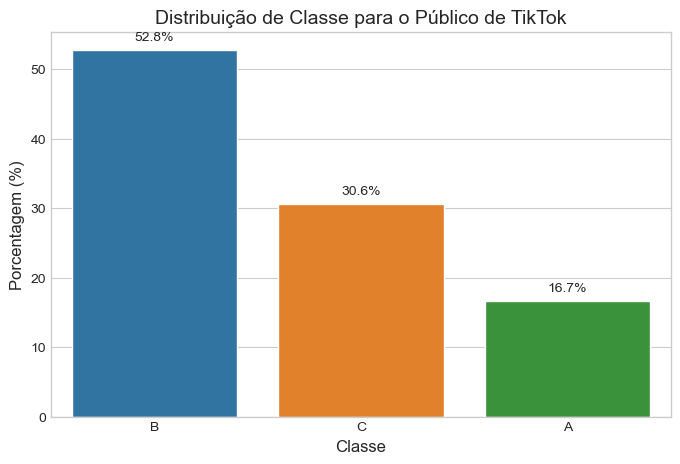

--- Perfil do Público de Spotify ---

Idade Média: 39.27 anos

Distribuição de Classe:
Classe
B    39.39
A    39.39
C    21.21
Name: proportion, dtype: float64


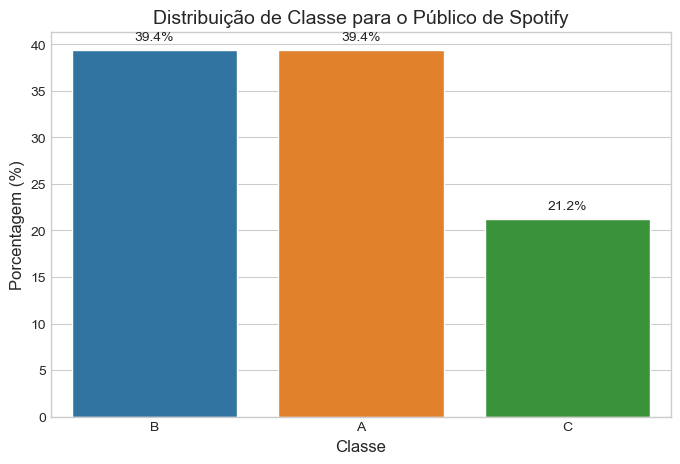

--- Perfil do Público de YouTube ---

Idade Média: 35.96 anos

Distribuição de Classe:
Classe
B    50.00
C    39.29
A    10.71
Name: proportion, dtype: float64


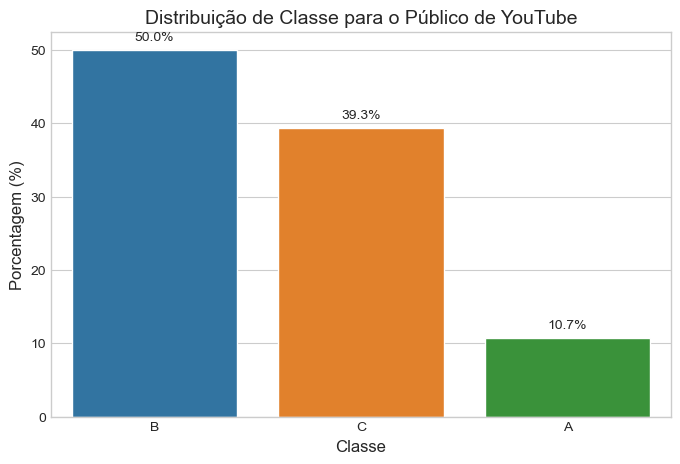

--- Perfil do Público de Instagram ---

Idade Média: 38.92 anos

Distribuição de Classe:
Classe
B    53.85
C    30.77
A    15.38
Name: proportion, dtype: float64


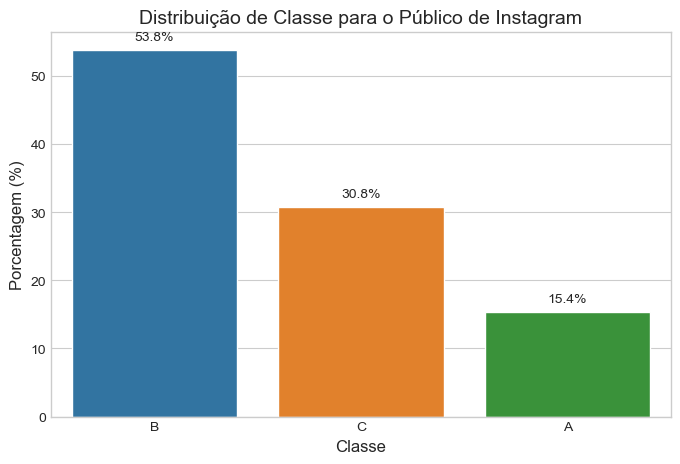

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para estilo de visualização
sns.set_style("whitegrid")

# --- Análise para o Público de TikTok ---
df_tiktok = df_engov[df_engov['Midia_Preferida'] == 'TikTok']
print("="*50)
print(f"--- Perfil do Público de TikTok ---")
print(f"\nIdade Média: {df_tiktok['Idade'].mean():.2f} anos")
print("\nDistribuição de Classe:")
class_dist_tiktok = df_tiktok['Classe'].value_counts(normalize=True) * 100
print(class_dist_tiktok.round(2))
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=class_dist_tiktok.index, y=class_dist_tiktok.values, hue=class_dist_tiktok.index, legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.title('Distribuição de Classe para o Público de TikTok', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.show()

# --- Análise para o Público de Spotify ---
df_spotify = df_engov[df_engov['Midia_Preferida'] == 'Spotify']
print("="*50)
print(f"--- Perfil do Público de Spotify ---")
print(f"\nIdade Média: {df_spotify['Idade'].mean():.2f} anos")
print("\nDistribuição de Classe:")
class_dist_spotify = df_spotify['Classe'].value_counts(normalize=True) * 100
print(class_dist_spotify.round(2))
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=class_dist_spotify.index, y=class_dist_spotify.values, hue=class_dist_spotify.index, legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.title('Distribuição de Classe para o Público de Spotify', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.show()

# --- Análise para o Público de YouTube ---
df_youtube = df_engov[df_engov['Midia_Preferida'] == 'YouTube']
print("="*50)
print(f"--- Perfil do Público de YouTube ---")
print(f"\nIdade Média: {df_youtube['Idade'].mean():.2f} anos")
print("\nDistribuição de Classe:")
class_dist_youtube = df_youtube['Classe'].value_counts(normalize=True) * 100
print(class_dist_youtube.round(2))
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=class_dist_youtube.index, y=class_dist_youtube.values, hue=class_dist_youtube.index, legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.title('Distribuição de Classe para o Público de YouTube', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.show()

# --- Análise para o Público de Instagram ---
df_instagram = df_engov[df_engov['Midia_Preferida'] == 'Instagram']
print("="*50)
print(f"--- Perfil do Público de Instagram ---")
print(f"\nIdade Média: {df_instagram['Idade'].mean():.2f} anos")
print("\nDistribuição de Classe:")
class_dist_instagram = df_instagram['Classe'].value_counts(normalize=True) * 100
print(class_dist_instagram.round(2))
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=class_dist_instagram.index, y=class_dist_instagram.values, hue=class_dist_instagram.index, legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.title('Distribuição de Classe para o Público de Instagram', fontsize=14)
plt.xlabel('Classe', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.show()

# Análise de Mídia por Classe Social

--- Mídia Preferida do Público da Classe A ---

Distribuição de Mídia:
Midia_Preferida
Spotify      30.95
Revistas     19.05
TikTok       14.29
TV Aberta    11.90
Instagram     9.52
YouTube       7.14
Rádio FM      7.14
Name: proportion, dtype: float64


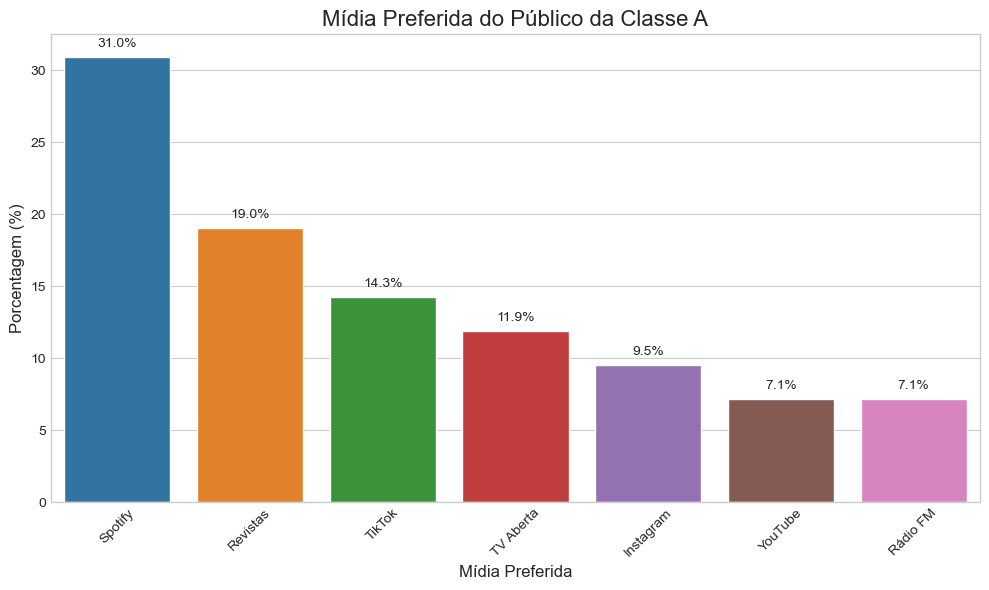

--- Mídia Preferida do Público da Classe B ---

Distribuição de Mídia:
Midia_Preferida
TV Aberta    22.0
TikTok       19.0
YouTube      14.0
Instagram    14.0
Spotify      13.0
Rádio FM      9.0
Revistas      9.0
Name: proportion, dtype: float64


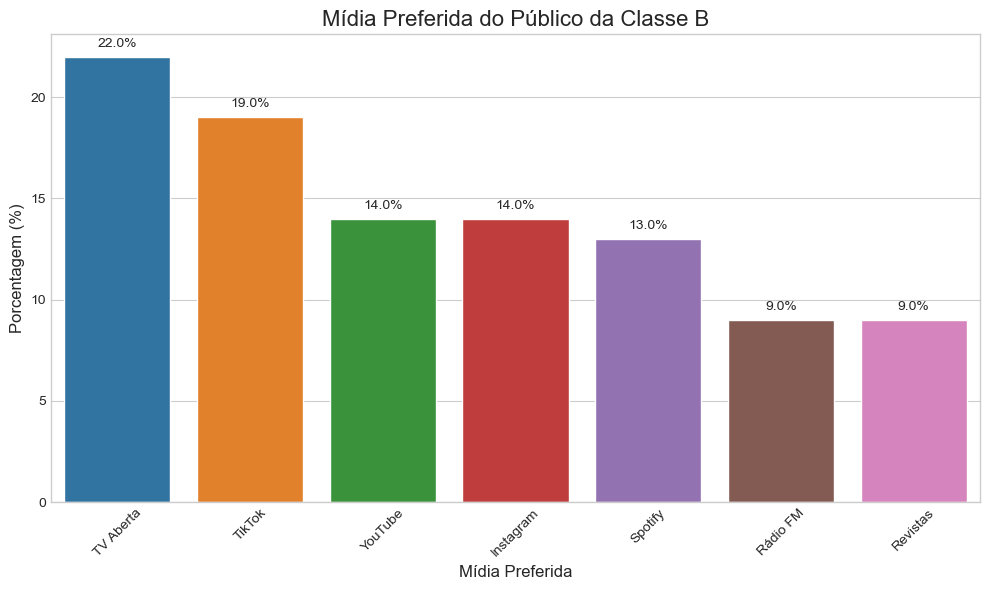

--- Mídia Preferida do Público da Classe C ---

Distribuição de Mídia:
Midia_Preferida
TikTok       18.97
TV Aberta    18.97
YouTube      18.97
Instagram    13.79
Spotify      12.07
Revistas      8.62
Rádio FM      8.62
Name: proportion, dtype: float64


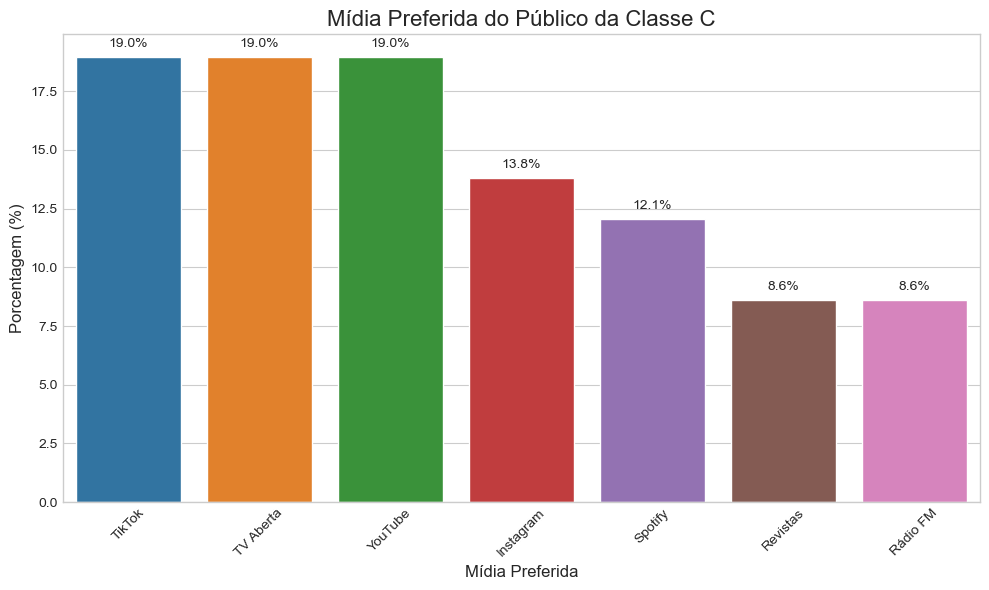

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de classes sociais para análise
class_list = ['A', 'B', 'C']

# Configuração para estilo de visualização
sns.set_style("whitegrid")

# Itera sobre cada classe social para analisar o perfil de mídia preferida
for classe in class_list:
    
    # Filtra os dados para a classe específica
    df_current_class = df_engov[df_engov['Classe'] == classe].copy()
    
    print("="*50)
    print(f"--- Mídia Preferida do Público da Classe {classe} ---")
    
    # Análise de Mídia Preferida (Numérica)
    print("\nDistribuição de Mídia:")
    media_dist = df_current_class['Midia_Preferida'].value_counts(normalize=True) * 100
    print(media_dist.round(2))

    # Cria o gráfico de barras para a distribuição de mídia
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=media_dist.index, y=media_dist.values, hue=media_dist.index, legend=False)
    
    # Adiciona os rótulos de porcentagem
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='bottom', 
                    xytext=(0, 5), 
                    textcoords='offset points')
    
    plt.title(f'Mídia Preferida do Público da Classe {classe}', fontsize=16)
    plt.xlabel('Mídia Preferida', fontsize=12)
    plt.ylabel('Porcentagem (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **Insights da Análise por Classe Social**

A visualização dos três gráficos juntos nos permite ver um padrão de consumo de mídia muito mais complexo e estratégico.

## **1. O Público da Classe A é Único**

O gráfico da **Classe A** se destaca de todos os outros. A mídia preferida desse grupo não é a TV Aberta ou o TikTok, mas sim o **Spotify** (31%) e **Revistas** (19%). Essa é a prova que precisávamos: o público de maior poder aquisitivo tem hábitos de consumo de mídia distintos e valoriza plataformas que oferecem experiências sem interrupção e conteúdo de nicho. Para a marca Engov, este é um insight crucial para campanhas de fidelização e relacionamento.

## **2. TV Aberta é a Mídia de Massa**

A **TV Aberta** aparece como uma das mídias mais importantes nas classes **B** (22%) e **C** (19%). Isso reforça o papel da TV como o canal de massa ideal para alcançar a maioria da população. Embora o público de Classe A não a consuma tanto, a TV é a plataforma ideal para campanhas de grande alcance, focadas nas classes que compõem a maior parte da amostra.

## **3. O Triunfo do Digital nas Classes B e C**

O público das classes **B e C** tem um alto consumo de mídias digitais, mas com diferenças sutis.

- **Classe B:** Prefere **TV Aberta** e **TikTok**. Isso sugere que a marca pode alcançar esse público com campanhas de massa na TV e, em seguida, engajá-los com conteúdo rápido e relevante no TikTok.
- **Classe C:** Tem um consumo equilibrado de **TikTok, TV Aberta e YouTube**, com 19% para cada um. Essa pluralidade indica que a marca precisa de uma estratégia multicanal para atingir a Classe C, com uma forte presença digital.

## **Conclusão**

A análise por classe social nos mostra que não há um único canal de comunicação que funcione para todos. A marca Engov precisa de uma estratégia de mídia personalizada: **Spotify e Revistas** para a Classe A, e uma combinação de **TV Aberta e plataformas digitais** (TikTok e YouTube) para as Classes B e C.

#### Hábito de Balada e Frequência de Álcool por Consumo de Engov

--- Análise: Consumo de Engov por Hábito de Balada ---
Tabela de Porcentagens:
Consome_Engov      Não    Sim
Sai_para_Balada              
1x/mês           23.38  21.95
1x/semana        37.66  30.08
2x/semana        23.38  17.89
3x/semana         2.60   9.76
Nunca            12.99  20.33


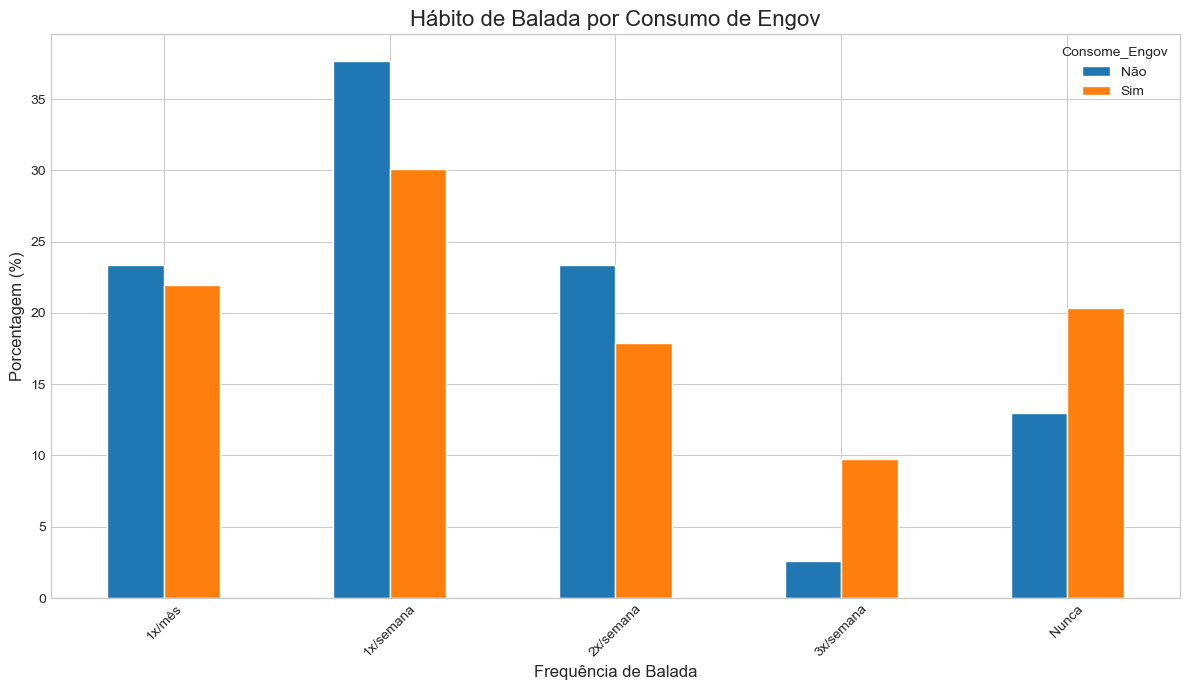


--- Análise: Consumo de Engov por Frequência de Álcool ---
Tabela de Porcentagens:
Consome_Engov        Não    Sim
Frequencia_Alcool              
Alta               31.17  35.77
Baixa              28.57  29.27
Média              40.26  34.96


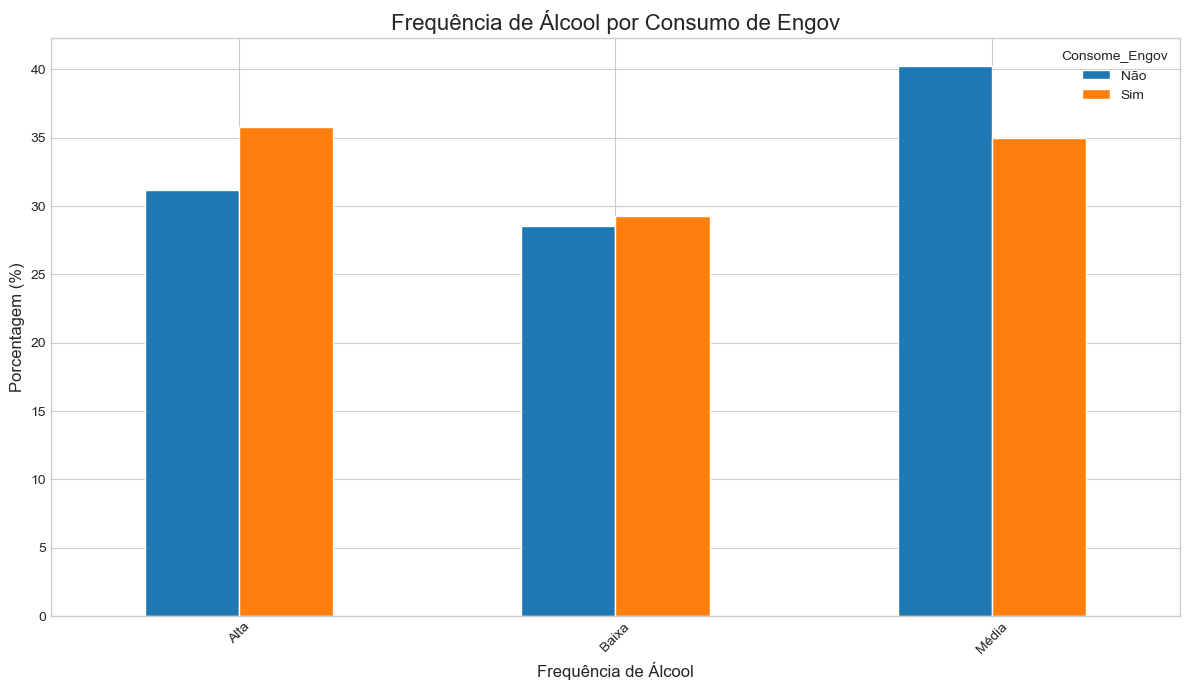

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para estilo de visualização
sns.set_style("whitegrid")

# --- Análise 1: Consome_Engov vs. Sai_para_Balada ---
print("--- Análise: Consumo de Engov por Hábito de Balada ---")
cross_tab_balada = pd.crosstab(df_engov['Sai_para_Balada'], df_engov['Consome_Engov'], normalize='columns') * 100
print("Tabela de Porcentagens:")
print(cross_tab_balada.round(2))
cross_tab_balada.plot(kind='bar', figsize=(12, 7), rot=45)
plt.title('Hábito de Balada por Consumo de Engov', fontsize=16)
plt.xlabel('Frequência de Balada', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Consome_Engov')
plt.tight_layout()
plt.show()

# --- Análise 2: Consome_Engov vs. Frequencia_Alcool ---
print("\n--- Análise: Consumo de Engov por Frequência de Álcool ---")
cross_tab_alcool = pd.crosstab(df_engov['Frequencia_Alcool'], df_engov['Consome_Engov'], normalize='columns') * 100
print("Tabela de Porcentagens:")
print(cross_tab_alcool.round(2))
cross_tab_alcool.plot(kind='bar', figsize=(12, 7), rot=45)
plt.title('Frequência de Álcool por Consumo de Engov', fontsize=16)
plt.xlabel('Frequência de Álcool', fontsize=12)
plt.ylabel('Porcentagem (%)', fontsize=12)
plt.legend(title='Consome_Engov')
plt.tight_layout()
plt.show()

#### Distribuição de Idade por Afinidade

--- Análise da Idade do Público de Baixa Afinidade ---

Estatísticas Descritivas:
count    94.00
mean     39.24
std      12.71
min      18.00
25%      30.00
50%      40.00
75%      50.00
max      59.00
Name: Idade, dtype: float64




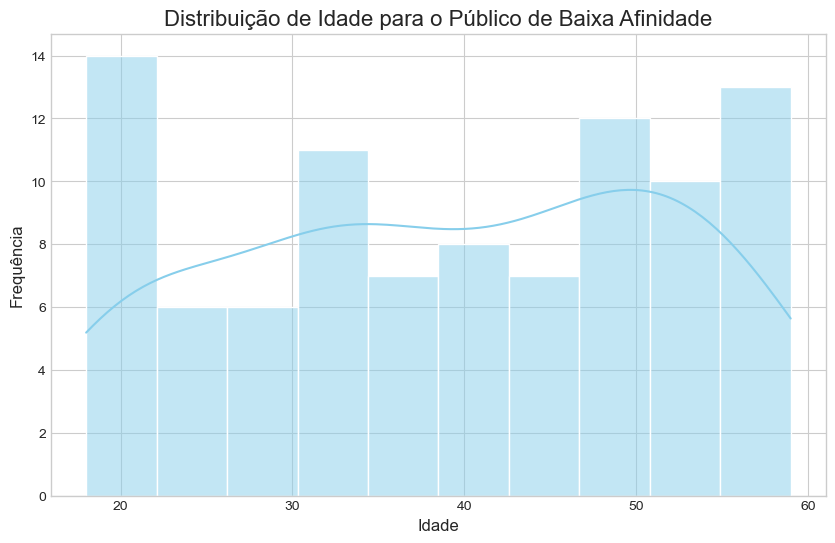



--- Análise da Idade do Público de Alta Afinidade ---

Estatísticas Descritivas:
count    106.00
mean      39.14
std       11.58
min       19.00
25%       30.00
50%       39.50
75%       48.75
max       59.00
Name: Idade, dtype: float64




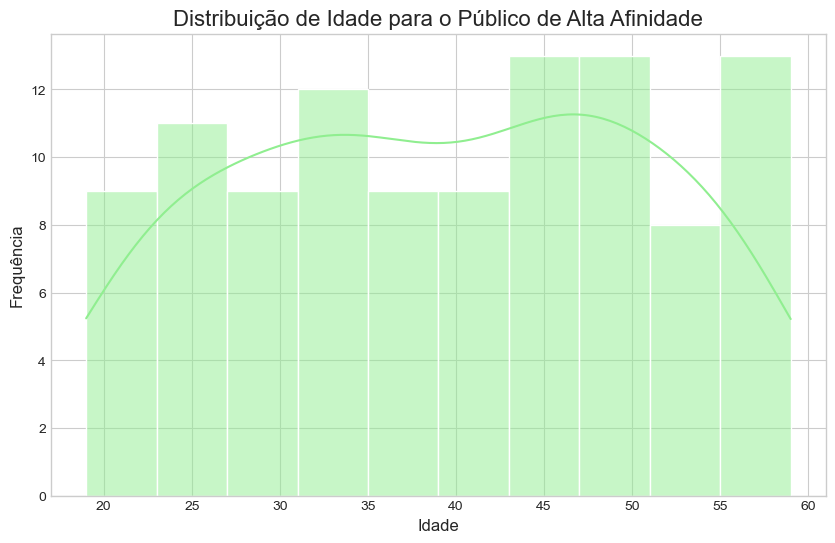

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define os limites de afinidade para os grupos
# 'Baixa Afinidade' = Indice_Afinidade < 130 (aproximadamente a mediana)
# 'Alta Afinidade' = Indice_Afinidade >= 130
baixa_afinidade = df_engov[df_engov['Indice_Afinidade'] < 130]
alta_afinidade = df_engov[df_engov['Indice_Afinidade'] >= 130]

# Configuração para estilo de visualização
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')

# --- Análise 1: Idade do Público de Baixa Afinidade ---
print("--- Análise da Idade do Público de Baixa Afinidade ---")
print("\nEstatísticas Descritivas:")
print(baixa_afinidade['Idade'].describe().round(2))
print("\n")
plt.figure(figsize=(10, 6))
sns.histplot(baixa_afinidade['Idade'], kde=True, bins=10, color='skyblue')
plt.title('Distribuição de Idade para o Público de Baixa Afinidade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

# --- Análise 2: Idade do Público de Alta Afinidade ---
print("\n" + "="*50 + "\n")
print("--- Análise da Idade do Público de Alta Afinidade ---")
print("\nEstatísticas Descritivas:")
print(alta_afinidade['Idade'].describe().round(2))
print("\n")
plt.figure(figsize=(10, 6))
sns.histplot(alta_afinidade['Idade'], kde=True, bins=10, color='lightgreen')
plt.title('Distribuição de Idade para o Público de Alta Afinidade', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

#  4: Pré-processamento dos Dados para Clusterização

A maioria dos algoritmos de clusterização, como o K-Means que pretendemos usar, funciona melhor com dados numéricos. Isso porque eles calculam distâncias entre os pontos para formar os grupos. Variáveis categóricas (como "Masculino" e "Feminino") e variáveis numéricas em escalas muito diferentes podem "enganar" o algoritmo.

Para resolver isso, vamos seguir dois passos:

1- Codificação de Variáveis Categóricas: Vamos transformar as variáveis como Sexo ou Midia_Preferida em um formato numérico. A técnica mais comum é a One-Hot Encoding. Basicamente, criaremos uma nova coluna para cada categoria. Por exemplo, a coluna Sexo se tornará Sexo_M e Sexo_F. Se o respondente for M, o valor em Sexo_M será 1 e em Sexo_F será 0.

2- Padronização das Variáveis Numéricas: As variáveis Idade, Indice_Afinidade e Peso_Projecao têm escalas muito diferentes. O Indice_Afinidade vai até 200, enquanto a Idade vai até 60. Se não padronizarmos, o Indice_Afinidade terá um peso muito maior na hora de calcular a distância entre os pontos, o que distorceria a clusterização. A padronização (StandardScaler) ajustará todas as variáveis para que tenham média 0 e desvio padrão 1.

O código a seguir fará todo esse pré-processamento, criando um novo DataFrame (df_cluster) pronto para a clusterização.

In [7]:
# Importa as bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define as listas de colunas para codificação e padronização
categorical_cols_to_encode = ['Sexo', 'Classe', 'Regiao', 'Consome_Engov', 'Frequencia_Alcool', 'Sai_para_Balada', 'Midia_Preferida']
numerical_cols_to_scale = ['Idade', 'Indice_Afinidade', 'Peso_Projecao']

# Realiza o One-Hot Encoding nas variáveis categóricas
df_encoded = pd.get_dummies(df_engov, columns=categorical_cols_to_encode, drop_first=True)

# Cria um novo DataFrame com as colunas numéricas a serem padronizadas
df_to_scale = df_encoded[numerical_cols_to_scale]

# Inicializa o padronizador e aplica a padronização
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_to_scale)

# Cria um DataFrame a partir dos dados padronizados
df_scaled = pd.DataFrame(scaled_features, columns=numerical_cols_to_scale)

# Remove as colunas originais do DataFrame codificado e adiciona as padronizadas
df_cluster = df_encoded.drop(columns=numerical_cols_to_scale)
df_cluster = pd.concat([df_cluster, df_scaled], axis=1)

# Mostra as 5 primeiras linhas do novo DataFrame para verificação
print("--- DataFrame preparado para clusterização ---")
print(df_cluster.head())
print("\n")

# Mostra o formato final do DataFrame
print("--- Dimensões do DataFrame final ---")
print(f"Número de linhas: {df_cluster.shape[0]}, Número de colunas: {df_cluster.shape[1]}")

--- DataFrame preparado para clusterização ---
   Respondent_ID  Sexo_M  Classe_B  Classe_C  Regiao_MG  Regiao_PE  Regiao_PR  \
0              1    True      True     False      False      False       True   
1              2   False     False      True      False      False      False   
2              3    True      True     False      False      False      False   
3              4    True      True     False      False      False      False   
4              5    True      True     False      False      False      False   

   Regiao_RJ  Regiao_RS  Regiao_SP  ...  Sai_para_Balada_Nunca  \
0      False      False      False  ...                   True   
1      False      False      False  ...                  False   
2       True      False      False  ...                   True   
3      False      False       True  ...                  False   
4      False      False      False  ...                  False   

   Midia_Preferida_Revistas  Midia_Preferida_Rádio FM  \
0           

# 4: Metodologia de Clusterização

Agora que os dados estão preparados, o próximo passo crucial é determinar o número ideal de clusters. Fazer isso de forma intuitiva pode levar a resultados incorretos. A melhor maneira é usar uma técnica conhecida como Método do Cotovelo (Elbow Method).

O que é o Método do Cotovelo?
O Método do Cotovelo nos ajuda a encontrar o número de clusters (o valor de "k") onde a clusterização começa a ter um bom resultado. A ideia é a seguinte:

1- Rodamos o algoritmo K-Means para um número crescente de clusters (por exemplo, de 1 a 10).

2- Em cada rodada, calculamos a inércia, que é a soma das distâncias quadradas dos pontos até o centro do seu cluster.

3- Plotamos a inércia em um gráfico. A inércia tende a diminuir conforme aumentamos o número de clusters (afinal, mais grupos significam pontos mais próximos dos seus centros).

4- Procuramos no gráfico um ponto de inflexão, que se parece com um "cotovelo". Esse ponto é o valor ideal de k, pois ele representa o ponto em que a diminuição da inércia começa a se tornar menos significativa.

C:\Users\arthu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\arthu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\arthu\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\arthu\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

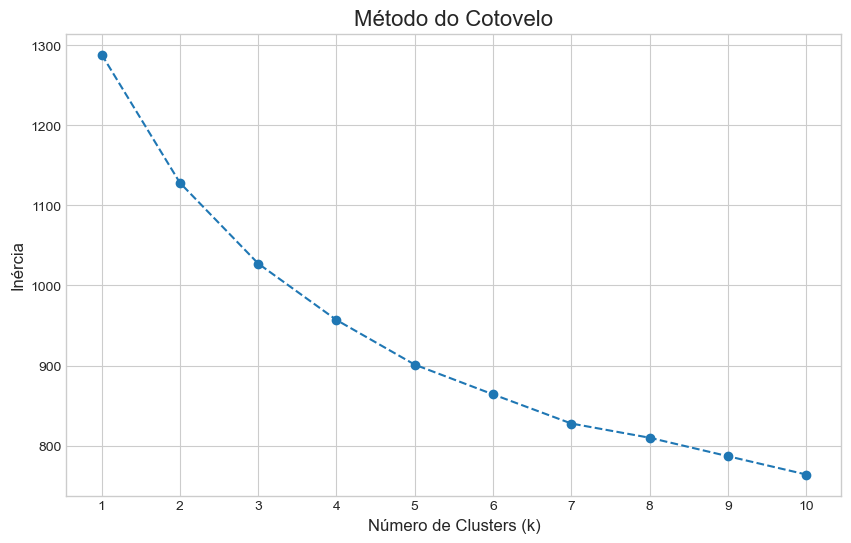

In [8]:
# Importa as bibliotecas necessárias para o K-Means e visualização
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# A coluna Respondent_ID não é uma feature para o clustering. Vamos removê-la.
df_features = df_cluster.drop(columns=['Respondent_ID'])

# Lista para armazenar a inércia (soma das distâncias quadradas)
inertia = []

# Varia o número de clusters de 1 a 10
range_k = range(1, 11)

# Itera sobre o número de clusters e calcula a inércia
for k in range_k:
    # Cria o modelo KMeans. O parâmetro n_init evita avisos de FutureWarning.
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(df_features)
    inertia.append(model.inertia_)

# Cria o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.xticks(range_k)
plt.grid(True)
plt.show()

Conclusão: 
A análise do Método do Cotovelo sugere que três clusters (k=3) é o número ideal para a nossa segmentação. Isso faz sentido com a nossa análise anterior do Indice_Afinidade, que já sugeria a existência de, pelo menos, dois grupos (alta e baixa afinidade). Ter três clusters pode indicar que há um terceiro grupo "neutro" ou um sub-grupo de "baixa/alta afinidade" com características distintas.

# 5: Execução da Clusterização e Análise dos Resultados

C:\Users\arthu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


--- Clusterização concluída! ---


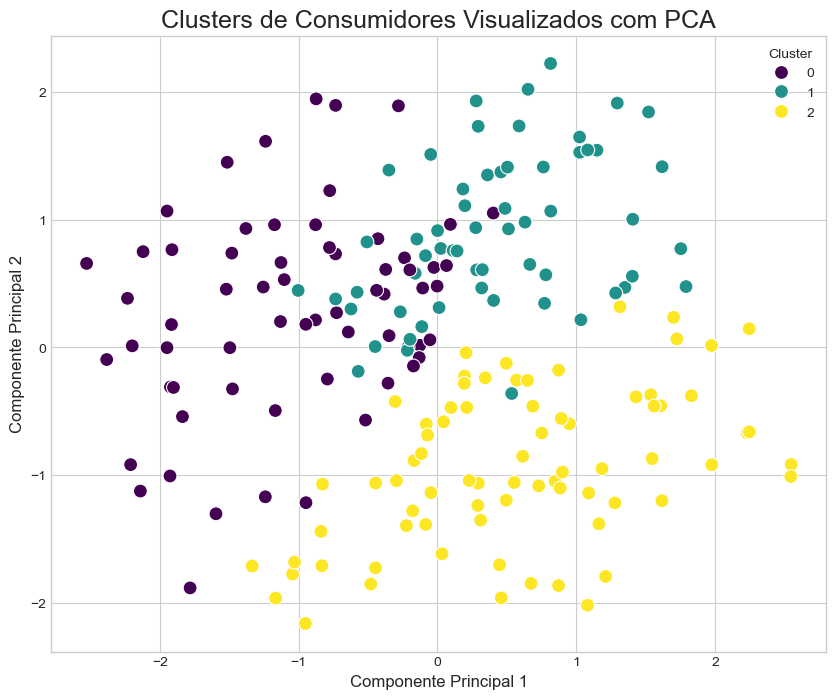


--- Análise da Média das Variáveis Numéricas por Cluster ---
         Idade  Indice_Afinidade  Peso_Projecao
Cluster                                        
0        36.09            153.03        1432.18
1        42.98            166.85        3607.15
2        38.89             91.86        3230.42


--- Análise da Distribuição das Variáveis Categóricas por Cluster ---

Variável: Sexo
Sexo         F      M
Cluster              
0        41.54  58.46
1        45.76  54.24
2        48.68  51.32

Variável: Consome_Engov
Consome_Engov    Não    Sim
Cluster                    
0              43.08  56.92
1              25.42  74.58
2              44.74  55.26

Variável: Midia_Preferida
Midia_Preferida  Instagram  Revistas  Rádio FM  Spotify  TV Aberta  TikTok  \
Cluster                                                                      
0                    10.77      7.69      9.23    23.08      20.00   16.92   
1                    15.25     15.25     11.86    10.17      23.73    8.47

In [18]:
# Importa as bibliotecas necessárias para K-Means e visualização
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define o número de clusters ideal
optimal_k = 3

# Cria o modelo KMeans com 3 clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Atribui os clusters a cada respondente no DataFrame original
df_engov['Cluster'] = kmeans_model.fit_predict(df_features)

print("--- Clusterização concluída! ---")

# --- Visualização da Clusterização com PCA ---
# Aplica o PCA para reduzir a dimensionalidade para 2 componentes
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(df_features)

# Cria um novo DataFrame com os componentes principais e os rótulos de cluster
df_pca_cluster = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca_cluster['Cluster'] = df_engov['Cluster']

# Plota os clusters em um gráfico de dispersão
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1", 
    y="PC2", 
    hue="Cluster", 
    data=df_pca_cluster, 
    palette="viridis", 
    s=100
)
plt.title('Clusters de Consumidores Visualizados com PCA', fontsize=18)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# --- Análise da Média das Variáveis Numéricas por Cluster ---
print("\n--- Análise da Média das Variáveis Numéricas por Cluster ---")
numerical_summary = df_engov.groupby('Cluster')[['Idade', 'Indice_Afinidade', 'Peso_Projecao']].mean()
print(numerical_summary.round(2))
print("\n")

# --- Análise da Distribuição das Variáveis Categóricas por Cluster ---
print("--- Análise da Distribuição das Variáveis Categóricas por Cluster ---")
categorical_cols = ['Sexo', 'Consome_Engov', 'Midia_Preferida']
for col in categorical_cols:
    print(f"\nVariável: {col}")
    # Cria uma tabela cruzada para ver a distribuição por cluster
    cross_tab = pd.crosstab(df_engov['Cluster'], df_engov[col], normalize='index') * 100
    print(cross_tab.round(2))

#### Interpretação dos Clusters
##### Cluster 0: O Consumidor Cauteloso
Perfil: Com uma idade média de 36 anos e uma afinidade com a marca acima da média (153.03), este grupo já tem um bom relacionamento com a marca Engov. A taxa de consumo (56.92%) é boa, mas não tão alta quanto a de outros clusters.

- Características: A mídia preferida é bastante variada, mas com destaque para Spotify (23.08%), TV Aberta (20.00%) e TikTok (16.92%). A distribuição de gênero é predominantemente masculina (58.46%). Eles parecem ser um público engajado, mas que talvez não esteja totalmente convertido ao consumo regular.

##### Cluster 1: O Consumidor Fiel
Perfil: Este é o grupo mais maduro, com idade média de quase 43 anos, e a maior afinidade com a marca (166.85). A taxa de consumo de Engov é a mais alta de todos os grupos (74.58%).

- Características: A mídia preferida é a TV Aberta (23.73%), seguida de perto por Instagram e Revistas (ambas com 15.25%). Eles representam o consumidor tradicional e leal da marca. Este é o público que a Engov precisa manter e fidelizar.

##### Cluster 2: O Público em Potencial
Perfil: Com uma idade média de 39 anos, este grupo se destaca por ter a menor afinidade com a marca (91.86). A taxa de consumo de Engov é a mais baixa entre os grupos, com quase metade deles (44.74%) não consumindo o produto.

- Características: Este público prefere o TikTok (26.32%), o que sugere que eles podem ser mais jovens ou mais digitais que os outros grupos. A afinidade baixa e a alta porcentagem de não-consumidores indicam que este é o público mais difícil de converter.

##### Resumo e Próximos Passos
- Cluster 1 (Fiel): O foco da marca deve ser em estratégias de fidelização e manutenção do relacionamento, possivelmente com campanhas em mídias tradicionais como a TV e revistas.

- Cluster 0 (Cauteloso): A estratégia deve ser de conversão, transformando-os em consumidores mais regulares. A comunicação pode ser feita em plataformas como Spotify e TikTok.

- Cluster 2 (Potencial): A maior oportunidade de crescimento está aqui. O desafio é criar campanhas de aquisição que sejam relevantes para um público que prefere mídias como o TikTok e tem baixa afinidade inicial.